---
title: Cleaning The Data
tags: [jupyter]
keywords: pandas
summary: "We will use different cleaning techniques to clean the data before any analysis can be performed."
mlType: dataFrame
infoType: pandas
sidebar: pandas_sidebar
permalink: __AutoGenThis__
notebookfilename:  __AutoGenThis__
---

In [1]:
import sys
sys.path.append("../")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Padas Options

In [3]:
pd.set_option('max_rows', 8)

# I/O

In [57]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [58]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


Exploring the data.  We know that everything should be int or string.  If not then something went wrong and there are some cleaning we have to do. OR that months should be less than 12 and day must be less than 31

In [10]:
births.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

In [11]:
births.month.max()

12

In [13]:
births.day.max()

99.0

There we have a max of 99 which is not right.  The next step is to remove these outliers using various methods.

# Sigma Clipping Operation to Remove Outliers

In [59]:
births['decade'] = 10 * (births.year // 10)

In [60]:
quartiles = np.quantile(births['births'],[.25,.50,.75])
mu= quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [61]:
cleanBirths = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [62]:
cleanBirths

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
...,...,...,...,...,...,...
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980
15066,1988,12,31.0,M,4698,1980


In [63]:
# set 'day' column to integer; it originally was a string due to nulls
cleanBirths['day'] = cleanBirths['day'].astype(int)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
# create a datetime index from the year, month, day
cleanBirths.index = pd.to_datetime(10000 * cleanBirths.year +
                              100 * cleanBirths.month +
                              cleanBirths.day, format='%Y%m%d')

cleanBirths['dayofweek'] = cleanBirths.index.dayofweek

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 1008x432 with 0 Axes>

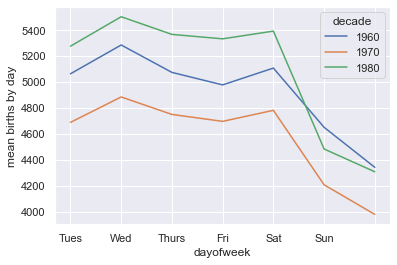

In [66]:
plt.figure(figsize=(14,6))

sns.set()

cleanBirths.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()

plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

plt.ylabel('mean births by day')

plt.show()
